In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data
import torch

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("KidneyCancerProcessed.csv")

In [4]:
df

,Gene_names,TCGA-KL-8339-11A-01R-2315-07,TCGA-KN-8433-11A-01R-2315-07,TCGA-KO-8415-11A-01R-2315-07,TCGA-KN-8435-11A-01R-2315-07,TCGA-KN-8422-11A-01R-2315-07,TCGA-KL-8332-11A-01R-2315-07,TCGA-KN-8434-11A-01R-2315-07,TCGA-KO-8405-01A-11R-2315-07,TCGA-KL-8329-11A-01R-2315-07,...,TCGA-KN-8424-01A-11R-2315-07,TCGA-KL-8339-01A-11R-2315-07,TCGA-KN-8426-01A-11R-2315-07,TCGA-KM-8440-01A-11R-2315-07,TCGA-KL-8336-11A-01R-2315-07,TCGA-KN-8430-01A-11R-2315-07,TCGA-KO-8414-01A-11R-2315-07,TCGA-KO-8417-01A-11R-2315-07,TCGA-KM-8443-01A-11R-2315-07,TCGA-KL-8344-01A-11R-2315-07
0,Outcome,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,ABAT,11.968607,11.826927,9.197400,12.342578,11.029398,12.340216,11.554297,2.481077,12.048458,...,5.656109,4.587539,2.618748,4.905863,8.456332,4.626617,4.699372,6.875927,8.872063,8.631520
2,ABCB7,5.640838,4.755733,4.187590,4.989948,4.807734,6.268149,5.064369,4.628512,5.319037,...,6.445497,7.584630,5.606528,6.230006,4.735196,6.243271,4.935928,6.608459,5.319037,6.294241
3,NAT1,8.410188,6.765108,6.486779,7.369320,6.705151,9.453464,7.484836,6.524608,7.478931,...,4.318486,5.854525,4.150910,5.179115,5.842515,6.552594,4.188822,4.698986,5.350126,4.054344
4,NAT2,12.288004,11.899269,12.338864,11.356385,13.321855,13.335200,11.992664,7.811360,10.796590,...,5.900554,4.746646,6.738112,4.746646,11.195150,5.900554,3.059249,3.059249,3.059249,4.746646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,LOC100302401,6.383320,7.767716,6.583230,7.658969,7.870005,6.090010,7.144570,7.094756,6.825656,...,5.675827,5.848224,4.994111,5.301973,7.376203,2.892768,4.294749,5.763185,5.763185,7.144570
19379,LOC100302640,7.314575,8.889083,8.335088,7.878687,9.517967,6.515633,6.684693,0.996738,4.459040,...,7.431019,4.459040,1.482517,7.540646,3.315392,4.772050,3.079914,5.199365,2.545843,3.740211
19380,NCRNA00182,6.190834,5.551667,6.477374,7.131384,7.111205,6.280145,6.733912,3.774834,5.280764,...,6.280145,5.116470,4.625647,5.970643,6.309265,4.900835,4.380354,5.074272,6.067082,7.670196
19381,TMED7.TICAM2,4.682485,1.807601,6.602052,6.136241,7.439860,4.960119,5.418082,4.517206,6.754818,...,6.286135,3.629051,7.209745,6.052063,4.823726,4.554555,6.572242,8.003650,5.219606,5.281824


In [5]:
df.describe()

,TCGA-KL-8339-11A-01R-2315-07,TCGA-KN-8433-11A-01R-2315-07,TCGA-KO-8415-11A-01R-2315-07,TCGA-KN-8435-11A-01R-2315-07,TCGA-KN-8422-11A-01R-2315-07,TCGA-KL-8332-11A-01R-2315-07,TCGA-KN-8434-11A-01R-2315-07,TCGA-KO-8405-01A-11R-2315-07,TCGA-KL-8329-11A-01R-2315-07,TCGA-KN-8436-01A-11R-2315-07,...,TCGA-KN-8424-01A-11R-2315-07,TCGA-KL-8339-01A-11R-2315-07,TCGA-KN-8426-01A-11R-2315-07,TCGA-KM-8440-01A-11R-2315-07,TCGA-KL-8336-11A-01R-2315-07,TCGA-KN-8430-01A-11R-2315-07,TCGA-KO-8414-01A-11R-2315-07,TCGA-KO-8417-01A-11R-2315-07,TCGA-KM-8443-01A-11R-2315-07,TCGA-KL-8344-01A-11R-2315-07
count,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,...,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000
mean,6.586384,6.289006,5.998591,6.932323,6.918709,6.161269,6.545135,5.461546,6.755332,5.585953,...,6.094038,5.335519,5.515187,5.249521,6.869458,5.695199,5.405033,5.344130,5.086754,6.319414
std,2.325959,2.262596,2.234406,2.300846,2.185177,2.598296,2.244222,1.931245,2.319526,2.049414,...,1.669798,2.063231,1.807951,1.758833,2.375492,1.639612,1.728921,1.705272,1.874621,1.930057
min,-2.564665,-2.465969,-2.564665,-2.278495,-2.725584,-2.564665,-2.252279,-2.642294,-2.465969,-2.889969,...,-2.501673,-2.858458,-2.725584,-2.106479,-1.944822,-2.889969,-2.192602,-2.465969,-2.805649,-2.730415
25%,5.226332,5.108461,4.760483,5.481737,5.499788,4.637243,5.325492,4.392817,5.413747,4.554510,...,5.281727,4.362171,4.555023,4.408223,5.405155,4.881780,4.444107,4.612681,4.230784,5.339659
50%,6.246937,5.891451,5.516434,6.626547,6.728805,5.699031,6.167953,5.230960,6.468466,5.499788,...,5.986372,5.467773,5.422009,5.393972,6.565049,5.516434,5.413747,5.499788,5.271724,6.335786
75%,7.550313,7.126471,6.797394,7.923924,7.859855,7.355504,7.323827,6.177572,7.683620,6.750638,...,6.893298,6.554193,6.487401,6.182177,8.126946,6.417012,6.434187,6.353231,6.043954,7.450639
max,20.571153,23.466381,20.166540,20.858537,22.579093,22.393724,21.454971,16.303835,20.458968,17.950142,...,16.861197,16.645223,16.644969,15.733680,18.147120,16.727536,14.494624,15.546257,16.377476,16.406022


In [6]:
df = df.T
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)

In [7]:
df

Gene_names,Outcome,ABAT,ABCB7,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,AARS,...,FAM7A2,LOC100288778,FRG2C,ZNF605,NHEG1,LOC100302401,LOC100302640,NCRNA00182,TMED7.TICAM2,LOC100303728
0,0.0,11.968607,5.640838,8.410188,12.288004,10.536393,7.294643,7.082065,6.740902,5.234985,...,4.21588,4.095547,8.142504,4.424023,5.413747,6.38332,7.314575,6.190834,4.682485,6.056538
1,0.0,11.826927,4.755733,6.765108,11.899269,6.34,7.294643,6.769169,7.519112,5.146987,...,5.310367,5.808729,1.933907,4.474459,5.413747,7.767716,8.889083,5.551667,1.807601,5.992096
2,0.0,9.1974,4.18759,6.486779,12.338864,5.717981,7.294643,6.427772,7.519112,4.302359,...,6.149757,3.935481,12.912513,4.215152,5.413747,6.58323,8.335088,6.477374,6.602052,6.333703
3,0.0,12.342578,4.989948,7.36932,11.356385,11.209315,5.310367,7.137367,6.740902,5.705337,...,6.149757,4.819067,5.132294,5.621216,5.413747,7.658969,7.878687,7.131384,6.136241,5.433449
4,0.0,11.029398,4.807734,6.705151,13.321855,6.496524,7.294643,7.508844,5.558823,6.044346,...,7.294643,4.026233,13.78379,5.73245,5.413747,7.870005,9.517967,7.111205,7.43986,6.896156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1.0,4.626617,6.243271,6.552594,5.900554,6.126137,5.310367,4.548381,3.720098,6.872762,...,8.515929,6.13412,3.372434,5.953758,5.413747,2.892768,4.77205,4.900835,4.554555,5.085829
87,1.0,4.699372,4.935928,4.188822,3.059249,3.713035,5.310367,4.920405,8.474411,6.717033,...,8.014484,5.66399,3.372434,6.24963,5.413747,4.294749,3.079914,4.380354,6.572242,5.858886
88,1.0,6.875927,6.608459,4.698986,3.059249,-2.047506,5.310367,5.291159,3.720098,5.489805,...,2.626242,5.043769,3.372434,6.696654,5.413747,5.763185,5.199365,5.074272,8.00365,5.616485
89,1.0,8.872063,5.319037,5.350126,3.059249,-0.106417,5.310367,4.900459,7.519112,4.623527,...,4.21588,6.268529,9.564899,5.926204,5.413747,5.763185,2.545843,6.067082,5.219606,6.215877


In [8]:
df['Outcome'].value_counts()

Outcome
1.0    66
0.0    25
Name: count, dtype: int64

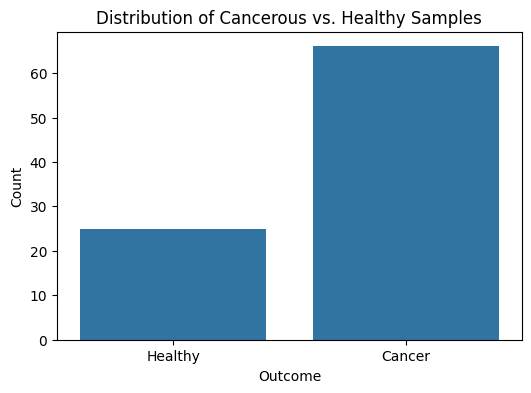

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Outcome"])
plt.xticks([0, 1], ["Healthy", "Cancer"])
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Cancerous vs. Healthy Samples")
plt.show()

In [10]:
top10_genes = ["Outcome", "DRD5", "USH1G","TYRP1", "ITIH2", "SLCO1A2", "ABCA4", "CYP4A11", "MYH8","CXorf57", "EDAR"]
df_top10 = df[top10_genes]

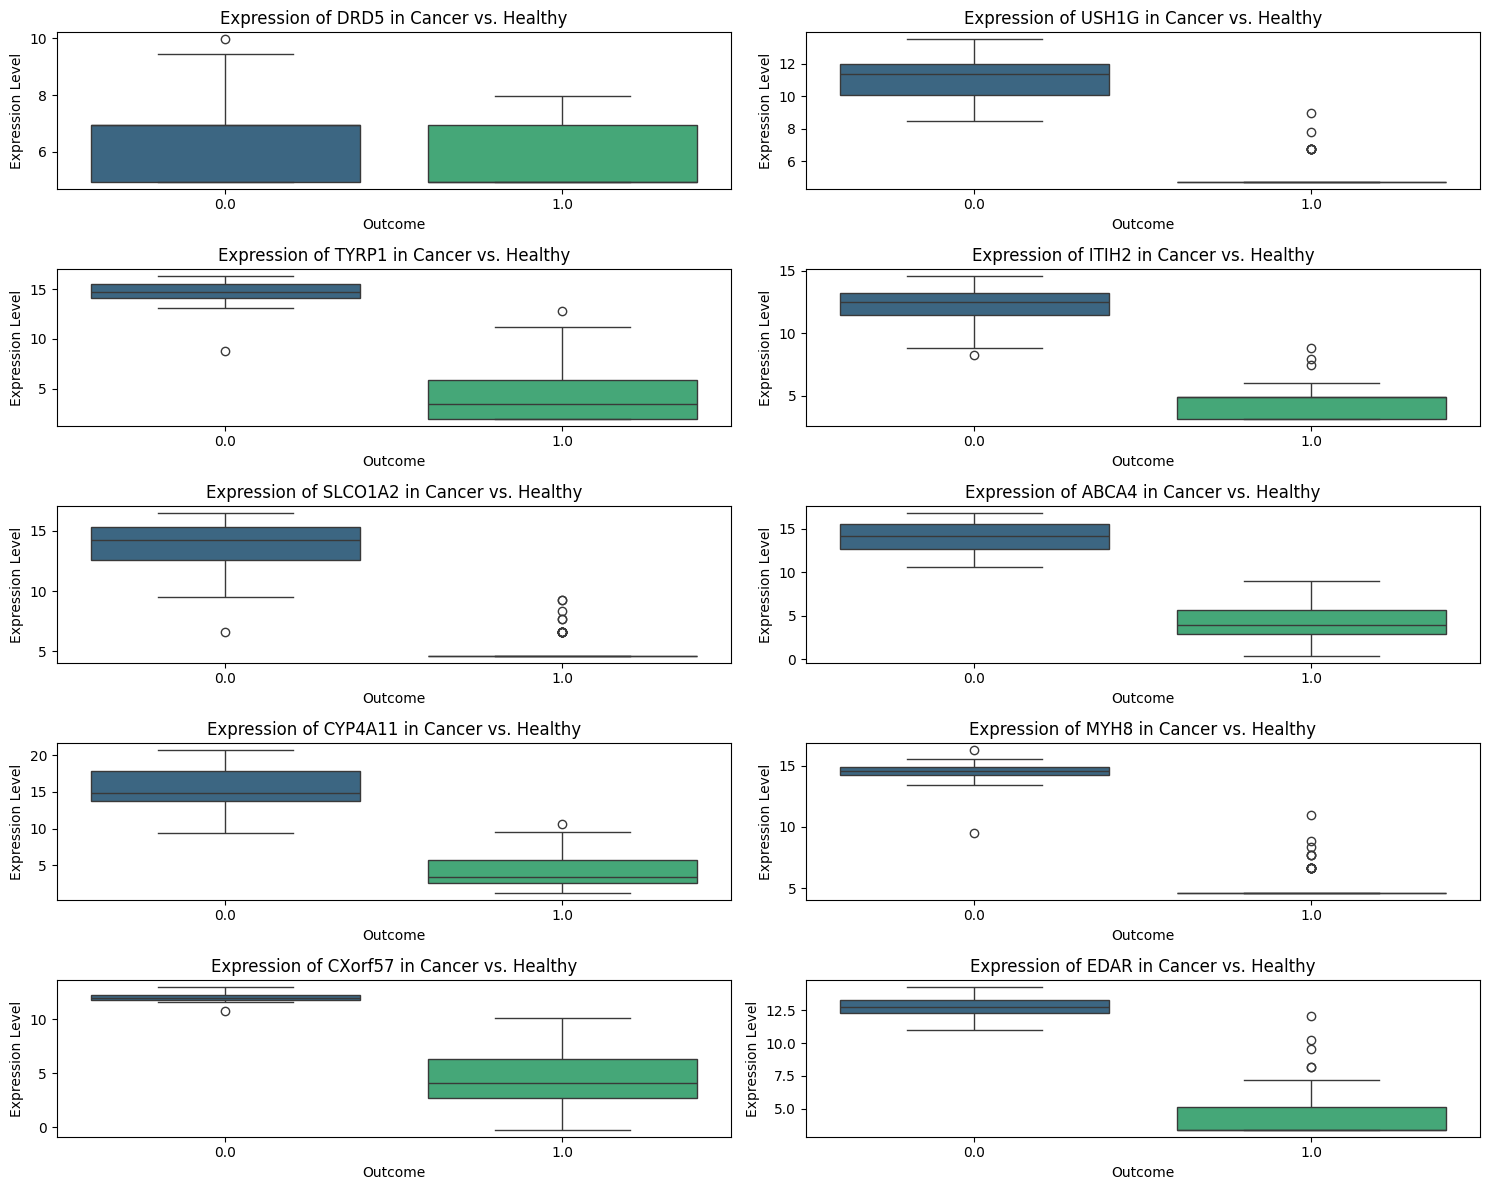

In [11]:
plt.figure(figsize=(15, 12))
for i, gene in enumerate(df_top10.columns[1:]):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x="Outcome", y=gene, data=df_top10, palette="viridis")
    plt.xlabel("Outcome")
    plt.ylabel("Expression Level")
    plt.title(f"Expression of {gene} in Cancer vs. Healthy")

plt.tight_layout()
plt.show()

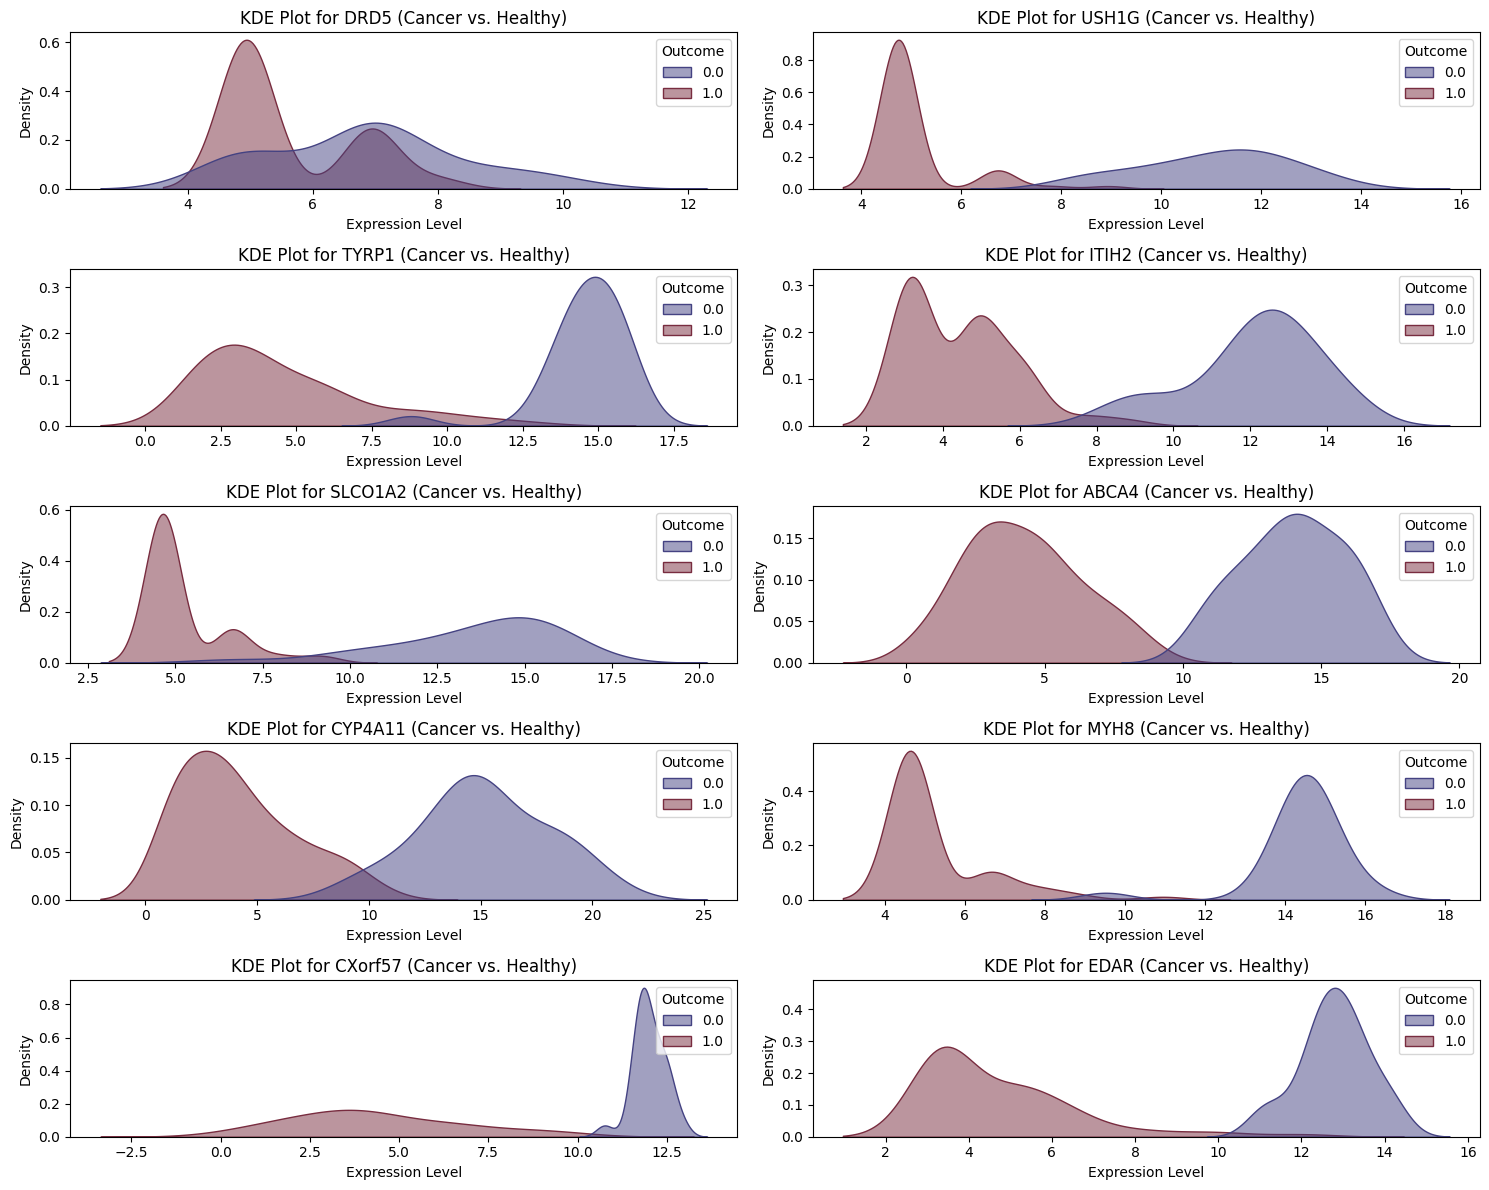

In [12]:
plt.figure(figsize=(15, 12))
for i, gene in enumerate(df_top10.columns[1:]):
    plt.subplot(5, 2, i + 1)
    sns.kdeplot(data=df_top10, x=gene, hue="Outcome", fill=True, common_norm=False, palette="icefire", alpha=0.5)
    plt.xlabel("Expression Level")
    plt.ylabel("Density")
    plt.title(f"KDE Plot for {gene} (Cancer vs. Healthy)")

plt.tight_layout()
plt.show()

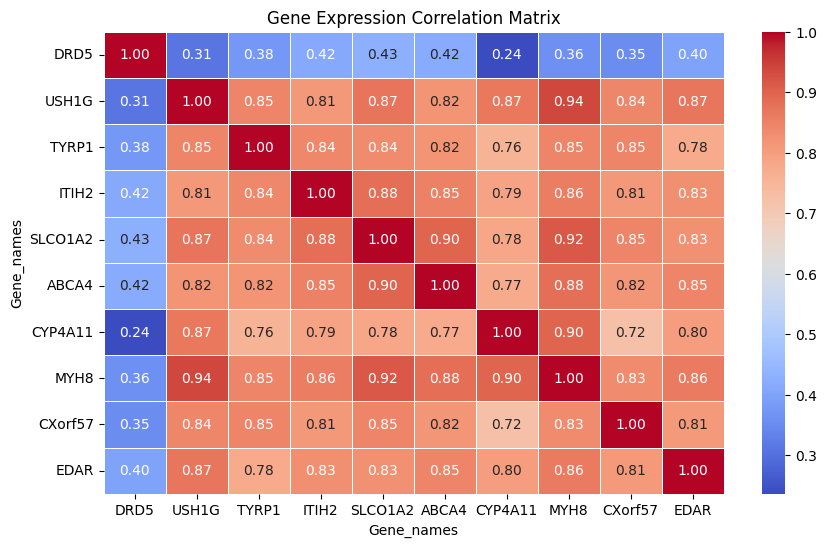

In [13]:
plt.figure(figsize=(10, 6))
corr_matrix = df_top10.iloc[:, 1:].astype(float).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Gene Expression Correlation Matrix")
plt.show()

In [14]:
df.dtypes

Gene_names
Outcome         object
ABAT            object
ABCB7           object
NAT1            object
NAT2            object
                 ...  
LOC100302401    object
LOC100302640    object
NCRNA00182      object
TMED7.TICAM2    object
LOC100303728    object
Length: 19383, dtype: object

In [15]:
df = df.apply(pd.to_numeric, errors='coerce')

In [16]:
df.dtypes

Gene_names
Outcome         float64
ABAT            float64
ABCB7           float64
NAT1            float64
NAT2            float64
                 ...   
LOC100302401    float64
LOC100302640    float64
NCRNA00182      float64
TMED7.TICAM2    float64
LOC100303728    float64
Length: 19383, dtype: object

In [17]:
#correlation = df.corr().iloc[:, 0]

In [18]:
# positive_corr_count = (correlation > 0.65).sum()
# negative_corr_count = (correlation < -0.65).sum()

# print(f"Positively correlated columns: {positive_corr_count}")
# print(f"Negatively correlated columns: {negative_corr_count}")

In [19]:
# strong_corr_columns = correlation[(correlation > 0.65) | (correlation < -0.65)].index

# df_filtered = df[strong_corr_columns]

# df_filtered

In [20]:
# missing_columns = [col for col in df_top10.columns if col not in df_filtered.columns]

# if not missing_columns:
#     print("All columns in df_top10 are present in df_filtered.")
# else:
#     print("The following columns from df_top10 are missing in df_filtered:", missing_columns)

In [21]:
# df_filtered

In [22]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [23]:
X

Gene_names,ABAT,ABCB7,NAT1,NAT2,SERPINA3,AADAC,AAMP,AANAT,AARS,A1BG,...,FAM7A2,LOC100288778,FRG2C,ZNF605,NHEG1,LOC100302401,LOC100302640,NCRNA00182,TMED7.TICAM2,LOC100303728
0,11.968607,5.640838,8.410188,12.288004,10.536393,7.294643,7.082065,6.740902,5.234985,7.760010,...,4.215880,4.095547,8.142504,4.424023,5.413747,6.383320,7.314575,6.190834,4.682485,6.056538
1,11.826927,4.755733,6.765108,11.899269,6.340000,7.294643,6.769169,7.519112,5.146987,7.550319,...,5.310367,5.808729,1.933907,4.474459,5.413747,7.767716,8.889083,5.551667,1.807601,5.992096
2,9.197400,4.187590,6.486779,12.338864,5.717981,7.294643,6.427772,7.519112,4.302359,6.181225,...,6.149757,3.935481,12.912513,4.215152,5.413747,6.583230,8.335088,6.477374,6.602052,6.333703
3,12.342578,4.989948,7.369320,11.356385,11.209315,5.310367,7.137367,6.740902,5.705337,5.802574,...,6.149757,4.819067,5.132294,5.621216,5.413747,7.658969,7.878687,7.131384,6.136241,5.433449
4,11.029398,4.807734,6.705151,13.321855,6.496524,7.294643,7.508844,5.558823,6.044346,7.650195,...,7.294643,4.026233,13.783790,5.732450,5.413747,7.870005,9.517967,7.111205,7.439860,6.896156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,4.626617,6.243271,6.552594,5.900554,6.126137,5.310367,4.548381,3.720098,6.872762,7.408029,...,8.515929,6.134120,3.372434,5.953758,5.413747,2.892768,4.772050,4.900835,4.554555,5.085829
87,4.699372,4.935928,4.188822,3.059249,3.713035,5.310367,4.920405,8.474411,6.717033,7.775146,...,8.014484,5.663990,3.372434,6.249630,5.413747,4.294749,3.079914,4.380354,6.572242,5.858886
88,6.875927,6.608459,4.698986,3.059249,-2.047506,5.310367,5.291159,3.720098,5.489805,2.176972,...,2.626242,5.043769,3.372434,6.696654,5.413747,5.763185,5.199365,5.074272,8.003650,5.616485
89,8.872063,5.319037,5.350126,3.059249,-0.106417,5.310367,4.900459,7.519112,4.623527,7.567355,...,4.215880,6.268529,9.564899,5.926204,5.413747,5.763185,2.545843,6.067082,5.219606,6.215877


In [24]:
from sklearn.neighbors import NearestNeighbors
graphs = {}
N = 5

for i in range(len(X)):

    nbrs = NearestNeighbors(n_neighbors=N, metric="euclidean").fit(X.iloc[[i]].T)
    distances, indices = nbrs.kneighbors(X.iloc[[i]].T)

    G = nx.Graph()

    for g1 in range(len(X.columns)):
        G.add_node(X.columns[g1])
        for n in range(1, N):
            g2 = indices[g1, n]
            G.add_edge(X.columns[g1], X.columns[g2], weight=distances[g1, n])
    graphs[f"Patient_{i+1}"] = G

In [25]:
graphs

{'Patient_1': <networkx.classes.graph.Graph at 0x20807951720>,
 'Patient_2': <networkx.classes.graph.Graph at 0x20807952f20>,
 'Patient_3': <networkx.classes.graph.Graph at 0x20807950340>,
 'Patient_4': <networkx.classes.graph.Graph at 0x20807952710>,
 'Patient_5': <networkx.classes.graph.Graph at 0x208079528c0>,
 'Patient_6': <networkx.classes.graph.Graph at 0x20807951f00>,
 'Patient_7': <networkx.classes.graph.Graph at 0x20807952170>,
 'Patient_8': <networkx.classes.graph.Graph at 0x20807952860>,
 'Patient_9': <networkx.classes.graph.Graph at 0x20807950190>,
 'Patient_10': <networkx.classes.graph.Graph at 0x20807952470>,
 'Patient_11': <networkx.classes.graph.Graph at 0x20807951db0>,
 'Patient_12': <networkx.classes.graph.Graph at 0x20807952530>,
 'Patient_13': <networkx.classes.graph.Graph at 0x20807952cb0>,
 'Patient_14': <networkx.classes.graph.Graph at 0x208079528f0>,
 'Patient_15': <networkx.classes.graph.Graph at 0x208079527d0>,
 'Patient_16': <networkx.classes.graph.Graph at 0

In [26]:
patient_1_graph = graphs["Patient_1"]

num_nodes = len(patient_1_graph.nodes())
node_list = list(patient_1_graph.nodes())

adj_matrix_1 = np.zeros((num_nodes, num_nodes))

for edge in patient_1_graph.edges(data=True):
    node1, node2, weight_dict = edge
    weight = weight_dict.get("weight", 0)

    i = node_list.index(node1)
    j = node_list.index(node2)

    adj_matrix_1[i, j] = weight
    adj_matrix_1[j, i] = weight

In [27]:
adj_matrix_1

array([[0.        , 0.00015274, 0.00167596, ..., 0.        , 0.        ,
        0.        ],
       [0.00015274, 0.        , 0.00152322, ..., 0.        , 0.        ,
        0.        ],
       [0.00167596, 0.00152322, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
nx.number_of_edges(patient_1_graph)

50382

In [29]:
patient_91_graph = graphs["Patient_91"]

num_nodes = len(patient_91_graph.nodes())
node_list = list(patient_91_graph.nodes())

adj_matrix_91 = np.zeros((num_nodes, num_nodes))

for edge in patient_91_graph.edges(data=True):
    node1, node2, weight_dict = edge
    weight = weight_dict.get("weight", 0)

    i = node_list.index(node1)
    j = node_list.index(node2)

    adj_matrix_91[i, j] = weight
    adj_matrix_91[j, i] = weight

In [30]:
nx.number_of_edges(patient_91_graph)

51388

In [31]:
nx.is_weighted(patient_1_graph)

True

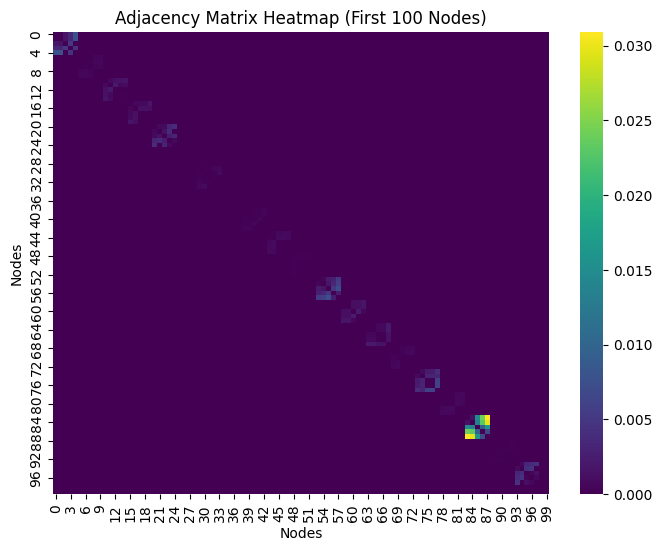

In [32]:
adj_matrix_subset_1 = adj_matrix_1[:100, :100]

plt.figure(figsize=(8, 6))
sns.heatmap(adj_matrix_subset_1, cmap="viridis")

plt.title("Adjacency Matrix Heatmap (First 100 Nodes)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.show()

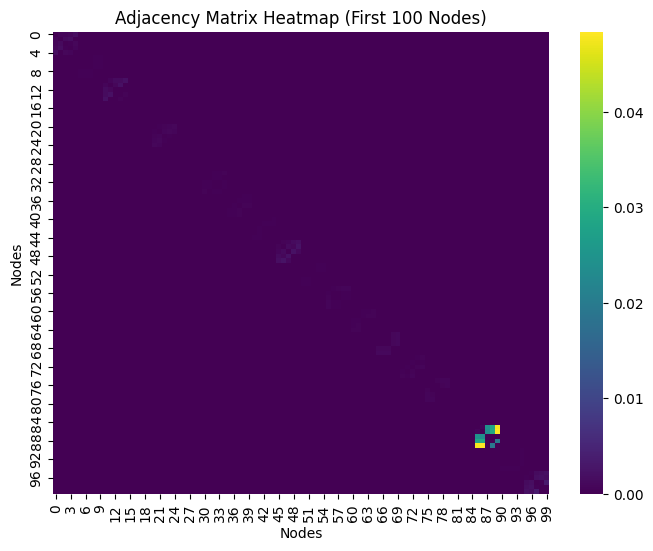

In [33]:
adj_matrix_subset_91 = adj_matrix_91[:100, :100]

plt.figure(figsize=(8, 6))
sns.heatmap(adj_matrix_subset_91, cmap="viridis")

plt.title("Adjacency Matrix Heatmap (First 100 Nodes)")
plt.xlabel("Nodes")
plt.ylabel("Nodes")
plt.show()

In [34]:
from pyvis.network import Network

net = Network(notebook=True)
net.from_nx(patient_1_graph)
net.show("graph.html")

graph.html
